In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/child-mind-institute-problematic-internet-use/sample_submission.csv
/kaggle/input/child-mind-institute-problematic-internet-use/data_dictionary.csv
/kaggle/input/child-mind-institute-problematic-internet-use/train.csv
/kaggle/input/child-mind-institute-problematic-internet-use/test.csv
/kaggle/input/child-mind-institute-problematic-internet-use/series_test.parquet/id=00115b9f/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_test.parquet/id=001f3379/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=0745c390/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=eaab7a96/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=8ec2cc63/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=b2987a65/part-0.parquet
/kaggle/input/child-mind-institute-problematic-intern

In [2]:
# packages

## Inspect Dataset

In [3]:
data_path = "/kaggle/input/child-mind-institute-problematic-internet-use/"
import os
import pandas as pd
print(os.listdir(data_path))
print(f"# of .parquet files for train : {len(os.listdir(data_path+'series_train.parquet'))}")
df_train = pd.read_csv(data_path+"train.csv")
df_test = pd.read_csv(data_path+"test.csv")
df_train = df_train[list(df_test.columns)+["sii"]]
print(df_train.head())
print(df_train.shape)

['sample_submission.csv', 'data_dictionary.csv', 'series_test.parquet', 'series_train.parquet', 'train.csv', 'test.csv']
# of .parquet files for train : 996
         id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
4  0016bb22                    Spring               18                1   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             51.0            Fall     16.877316             46.0   
1         NaN              NaN            Fall     14.035590             48.0   
2        Fall             71.0            Fall     16.648696             56.5   
3        Fall             71.0          Summer     18.292347        

In [4]:
target_cols = ["sii"]
feature_cols = list(df_train.columns)
feature_cols.remove('sii')
print(feature_cols)

['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_A-Season', 'PAQ_A-PAQ_A_Total', 'PAQ_C-Season', 'PAQ_C-PAQ_C

In [5]:
df_sample_parquet = pd.read_parquet(data_path+"series_train.parquet/id=ee67eb55/part-0.parquet")
print(df_sample_parquet.head())
print(df_sample_parquet.shape)

   step         X         Y         Z      enmo     anglez  non-wear_flag  \
0     0 -0.102485  0.015420  0.993102  0.000713  84.117256            0.0   
1     1 -0.102146  0.015122  0.994594  0.001267  84.122902            0.0   
2     2  0.087173 -0.193247  0.879646  0.021600  70.200447            0.0   
3     3 -0.056914  0.022769  0.988574  0.015040  85.323189            0.0   
4     4 -0.075100  0.013979  0.997422  0.001520  85.634636            0.0   

       light  battery_voltage     time_of_day  weekday  quarter  \
0  15.500000      4202.000000  45240000000000        4        2   
1   8.750000      4202.166504  45245000000000        4        2   
2  10.500000      4202.333496  45250000000000        4        2   
3  10.666667      4202.500000  45255000000000        4        2   
4   9.666667      4202.666504  45260000000000        4        2   

   relative_date_PCIAT  
0                 13.0  
1                 13.0  
2                 13.0  
3                 13.0  
4        

## Data Cleaning

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 60 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [7]:
# df_train1 = df_train.dropna(thresh = 50)
# df_train1 = df_train1.dropna(axis =1, thresh = 200)
df_train1 = df_train.copy()
df_train1 = df_train1[df_train1["sii"].notnull()]
print(df_train1.info())
print(df_train1.shape)



<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 60 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      2736 non-null   object 
 1   Basic_Demos-Enroll_Season               2736 non-null   object 
 2   Basic_Demos-Age                         2736 non-null   int64  
 3   Basic_Demos-Sex                         2736 non-null   int64  
 4   CGAS-Season                             2342 non-null   object 
 5   CGAS-CGAS_Score                         2342 non-null   float64
 6   Physical-Season                         2595 non-null   object 
 7   Physical-BMI                            2527 non-null   float64
 8   Physical-Height                         2530 non-null   float64
 9   Physical-Weight                         2572 non-null   float64
 10  Physical-Waist_Circumference            483 non-null    float64
 

In [8]:
df_train1

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0,1.0
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,NaN,NaN,Spring,4.110,Summer,40.0,56.0,Spring,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,ff6c2bb8,Fall,8,0,NaN,NaN,Fall,17.139810,52.5,67.2,...,NaN,NaN,Fall,3.440,Fall,41.0,58.0,Fall,2.0,0.0
3954,ff759544,Summer,7,1,NaN,NaN,Summer,13.927006,48.5,46.6,...,NaN,NaN,NaN,NaN,Summer,48.0,67.0,Summer,0.0,1.0
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,NaN,NaN,Winter,3.260,Winter,35.0,50.0,Fall,1.0,1.0
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,NaN,NaN,Winter,2.729,Winter,56.0,77.0,Fall,0.0,1.0


In [9]:
def labelEncoding(df):
    object_cols = list(df.select_dtypes(include = "object").columns)
    print(">>",object_cols)
    object_cols.remove("id")
    label_encoder_map = {}
    for col in object_cols:
        label_encoder_map[col] = {}
        col_new_values = []
        int_ = 0
        for _, row in df.iterrows():
            try:
                col_new_values.append(label_encoder_map[col][row[col]])
            except:
                if not pd.isna(row[col]):
                    label_encoder_map[col][row[col]] = int_
                    int_+=1
                    col_new_values.append(label_encoder_map[col][row[col]])
                else:
                    col_new_values.append(np.nan)
        df.drop(col, axis = 1, inplace = True)
        df[col] = col_new_values
    return df, label_encoder_map
print(df_train1["sii"].value_counts())
df_train2, label_encoder_map = labelEncoding(df_train1.copy())
col_to_move = "sii"
df_train2 = df_train2[[col for col in df_train2.columns if col != col_to_move] + [col_to_move]]
df_train2 = df_train2.drop("id", axis =1)
print(df_train2)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=80)
df_filled = imputer.fit_transform(df_train2)
print(np.unique(df_filled[:,-1], return_counts = True))
label_encoder_map

sii
0.0    1594
1.0     730
2.0     378
3.0      34
Name: count, dtype: int64
>> ['id', 'Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season', 'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season', 'PAQ_C-Season', 'SDS-Season', 'PreInt_EduHx-Season']
      Basic_Demos-Age  Basic_Demos-Sex  CGAS-CGAS_Score  Physical-BMI  \
0                   5                0             51.0     16.877316   
1                   9                0              NaN     14.035590   
2                  10                1             71.0     16.648696   
3                   9                0             71.0     18.292347   
5                  13                1             50.0     22.279952   
...               ...              ...              ...           ...   
3953                8                0              NaN     17.139810   
3954                7                1              NaN     13.927006   
3955               13                0             60.0     16.3624

{'Basic_Demos-Enroll_Season': {'Fall': 0,
  'Summer': 1,
  'Winter': 2,
  'Spring': 3},
 'CGAS-Season': {'Winter': 0, 'Fall': 1, 'Summer': 2, 'Spring': 3},
 'Physical-Season': {'Fall': 0, 'Summer': 1, 'Winter': 2, 'Spring': 3},
 'Fitness_Endurance-Season': {'Fall': 0,
  'Summer': 1,
  'Spring': 2,
  'Winter': 3},
 'FGC-Season': {'Fall': 0, 'Summer': 1, 'Winter': 2, 'Spring': 3},
 'BIA-Season': {'Fall': 0, 'Winter': 1, 'Summer': 2, 'Spring': 3},
 'PAQ_A-Season': {'Summer': 0, 'Spring': 1, 'Fall': 2, 'Winter': 3},
 'PAQ_C-Season': {'Fall': 0, 'Summer': 1, 'Winter': 2, 'Spring': 3},
 'SDS-Season': {'Fall': 0, 'Summer': 1, 'Winter': 2, 'Spring': 3},
 'PreInt_EduHx-Season': {'Fall': 0, 'Summer': 1, 'Winter': 2, 'Spring': 3}}

### Random Forest

In [10]:
# variables = list(df_filled.columns)
# variables.remove("sii")
# variables.remove("id")
target = "sii"
import numpy as np
X = np.delete(df_filled, -1, axis =1)
y = df_filled[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(np.unique(y_train, return_counts= True))
print(np.unique(y_test, return_counts= True))
print(X_train.shape , X_test.shape)

(array([0., 1., 2., 3.]), array([1085,  543,  261,   26]))
(array([0., 1., 2., 3.]), array([509, 187, 117,   8]))
(1915, 58) (821, 58)


In [12]:
from sklearn.ensemble import RandomForestClassifier as rf
clf = rf(n_estimators = 20)
clf.fit(X_train, y_train)
clf.feature_importances_

array([0.01754635, 0.00408327, 0.01920542, 0.01922678, 0.02736209,
       0.02751303, 0.01683127, 0.0177295 , 0.01677099, 0.01809572,
       0.02065153, 0.01878096, 0.02503203, 0.02380082, 0.00862525,
       0.02286154, 0.01114675, 0.02555212, 0.01652886, 0.01862096,
       0.00929437, 0.015456  , 0.0090861 , 0.01788804, 0.00920361,
       0.01734559, 0.00880323, 0.0110617 , 0.02447883, 0.02011972,
       0.01788141, 0.0178485 , 0.02241471, 0.01911042, 0.02046251,
       0.01914151, 0.02178798, 0.00948834, 0.02550472, 0.02248129,
       0.02198042, 0.02014312, 0.01886762, 0.02261641, 0.01932954,
       0.0319494 , 0.02844321, 0.02344856, 0.00751857, 0.00898648,
       0.00780687, 0.01149091, 0.00883959, 0.01022841, 0.01502724,
       0.01513808, 0.00792785, 0.00543393])

In [13]:
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
 
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_train, y_train_pred))


ACCURACY OF THE MODEL: 0.997911227154047


ACCURACY OF THE MODEL: 0.6090133982947625


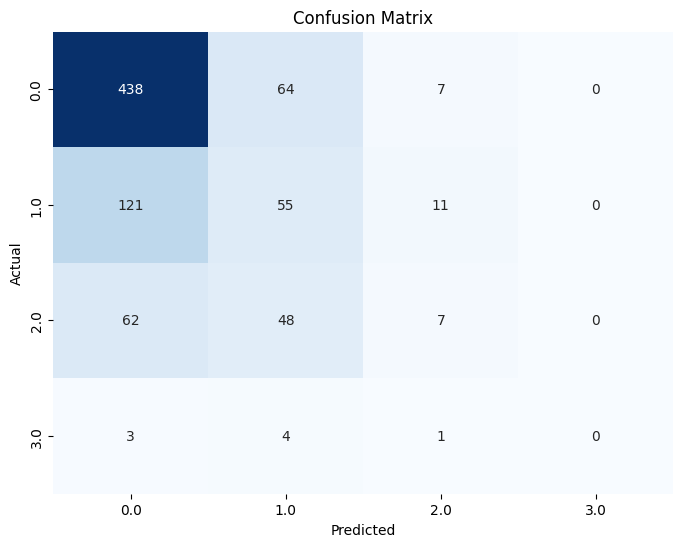

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Extract the unique class labels
    class_labels = sorted(set(y_test))

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, 
                xticklabels=[f'{label}' for label in class_labels],
                yticklabels=[f'{label}' for label in class_labels])
    
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Usage
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)


## Create Submission

In [15]:
label_encoder_map

{'Basic_Demos-Enroll_Season': {'Fall': 0,
  'Summer': 1,
  'Winter': 2,
  'Spring': 3},
 'CGAS-Season': {'Winter': 0, 'Fall': 1, 'Summer': 2, 'Spring': 3},
 'Physical-Season': {'Fall': 0, 'Summer': 1, 'Winter': 2, 'Spring': 3},
 'Fitness_Endurance-Season': {'Fall': 0,
  'Summer': 1,
  'Spring': 2,
  'Winter': 3},
 'FGC-Season': {'Fall': 0, 'Summer': 1, 'Winter': 2, 'Spring': 3},
 'BIA-Season': {'Fall': 0, 'Winter': 1, 'Summer': 2, 'Spring': 3},
 'PAQ_A-Season': {'Summer': 0, 'Spring': 1, 'Fall': 2, 'Winter': 3},
 'PAQ_C-Season': {'Fall': 0, 'Summer': 1, 'Winter': 2, 'Spring': 3},
 'SDS-Season': {'Fall': 0, 'Summer': 1, 'Winter': 2, 'Spring': 3},
 'PreInt_EduHx-Season': {'Fall': 0, 'Summer': 1, 'Winter': 2, 'Spring': 3}}

In [16]:
df_test = pd.read_csv(data_path + "test.csv")
print(df_test.shape)
def labelEncodingTest(df, label_encoder_map):
    # Loop through each column and its corresponding mapping in label_encoder_map
    for col, mapping in label_encoder_map.items():
        # Ensure the column exists in the DataFrame
        if col in df.columns:
            # Apply the mapping to encode the column values
            df[col] = df[col].map(mapping)
    
    return df

df_test1 = labelEncodingTest(df_test.copy(),label_encoder_map)

# df_train2 = df_train2[[col for col in df_train2.columns if col != col_to_move] + [col_to_move]]
id_ = df_test1["id"].to_list()
df_test1 = df_test1.drop("id", axis =1)
# print(df_test1)
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=80)
df_test_filled = imputer.fit_transform(df_test1)
df_test_filled

(20, 59)


array([[ 0. ,  5. ,  0. , ..., 52.3,  0. ,  3. ],
       [ 1. ,  9. ,  0. , ..., 64. ,  1. ,  0. ],
       [ 1. , 10. ,  1. , ..., 54. ,  1. ,  2. ],
       ...,
       [ 0. , 10. ,  1. , ..., 52.3,  0. ,  1. ],
       [ 2. ,  6. ,  0. , ..., 55. ,  2. ,  3. ],
       [ 2. , 10. ,  0. , ..., 52.3,  2. ,  2. ]])

In [17]:
y_test_pred = clf.predict(df_test_filled)
y_test_pred

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0.])

In [18]:
submission_df = pd.DataFrame({"id": id_ , "sii": [int(x) for x in list(y_test_pred)]})
submission_df["id"] = submission_df["id"].astype("object")
submission_df["sii"] = submission_df["sii"].astype("int")
submission_df.to_csv("/kaggle/working/"+"submission.csv", index=False)
sdf = pd.read_csv("/kaggle/working/"+"submission.csv")
sdf

,id,sii
0,00008ff9,0
1,000fd460,0
2,00105258,0
3,00115b9f,0
4,0016bb22,0
5,001f3379,1
6,0038ba98,0
7,0068a485,0
8,0069fbed,0
9,0083e397,0
